# 01 - EDA Airline Passenger Satisfaction‚úàÔ∏è ‚Äî ML Classification 

En este notebook vamos a explorar el dataset de satisfacci√≥n de pasajeros de aerol√≠neas.

El objetivo es:
- Comprender la estructura y caracter√≠sticas del dataset.
- Detectar valores nulos, duplicados y outliers.
- Analizar la distribuci√≥n de las variables principales.
- Identificar relaciones entre variables.
- Dejar el dataset limpio para su posterior uso en modelado (modelos predictivos).

## **Paso 1. Cargar librer√≠as y dataset**
Importamos las librer√≠as de an√°lisis y visualizaci√≥n que vamos a usar:

* pandas ‚Üí manipulaci√≥n de datos.
* matplotlib/seaborn ‚Üí visualizaciones est√°ticas.
* plotly ‚Üí gr√°ficos interactivos.
* sklean ‚Üí herramientas ML y DS.
* missingno ‚Üí visualizaci√≥n de datos nulos
* StandardScaler from scikit learn.preprocessing ‚Üí Escalado de variables

Carga del dataset: ""../data/airline_passenger_satisfaction.csv"

In [254]:
# ===================================
# 1. Import libraries
# ===================================


import pandas as pd                                                             # Data analysis and  Manipulaci√≥n de datos y an√°lisis
import numpy as np                                                              # C√°lculos num√©ricos                               
import matplotlib.pyplot as plt                                                 # Gr√°ficos b√°sicos (histogramas, scatter, etc.).
import seaborn as sns                                                           # Gr√°ficos estad√≠sticos con menos c√≥digo (heatmaps, distribuciones‚Ä¶)
import missingno as msno                                                        # Visualizaci√≥n de datos faltantes
from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # Escalado de variables (normalizaci√≥n y estandarizaci√≥n)
import os                                                                       # Interacci√≥n con el sistema operativo
from IPython.display import display, Markdown                                   # Mejorar la visualizaci√≥n en Jupyter Notebooks



# Configuraci√≥n de estilo general para gr√°ficos
sns.set_style("whitegrid")
plt.rcParams.update({"figure.figsize": (8,5), "axes.titlesize": 14, "axes.labelsize": 12})



# ===================================
# Cargar dataset original
# (el archivo debe estar en la carpeta data/)
# ===================================

# Define la ruta del archivo sin procesar
df = pd.read_csv("../data/airline_passenger_satisfaction.csv")
df.head(5)   # las primeras 5 filas del dataframe

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

## **Paso 2. EDA inicial: Informaci√≥n b√°sica**

En este bloque realizamos una **exploraci√≥n general del dataset**:
- Revisamos las primeras filas para entender la estructura de los datos.
- Comprobamos el n√∫mero de filas y columnas.
- Inspeccionamos el tipo de variables (num√©ricas y categ√≥ricas).
- Eliminamos columnas irrelevantes (`Unnamed: 0`, `id`), que son identificadores o √≠ndices exportados accidentalmente.


Este paso es clave para familiarizarnos con el dataset y planificar los siguientes pasos de limpieza y preprocesamiento.

In [255]:
# ===================================
# 2. EDA inicial: Informaci√≥n b√°sica
# ===================================

# Conocer la estructura b√°sica
# Dimensiones
print("Tama√±o del dataset:", df.shape)

# Informaci√≥n general
print("\nInformaci√≥n del dataset:\n")
df.info()

# Separador visual
print("\n" + "="*50 + "\n")

# Limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()


# Eliminar columnas irrelevantes si existen
cols_to_drop = ["Unnamed: 0", "id"]
# Detectar cu√°les de esas columnas existen realmente en el DataFrame
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Mostrar las que se van a eliminar
print("Columnas a eliminar:", existing_cols_to_drop)

# Eliminar solo si existen
if existing_cols_to_drop:
    df = df.drop(columns=existing_cols_to_drop)
    print("Columnas eliminadas correctamente.")
else:
    print("No se encontraron columnas irrelevantes para eliminar.")

# Dimensiones
print("Tama√±o del dataset tras eliminar columnas irrelevantes:", df.shape)

# Estad√≠sticas b√°sicas
df.describe(include="all").T





Tama√±o del dataset: (103904, 25)

Informaci√≥n del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 

count unique                      top  \
Gender                               103904      2                   Female   
Customer Type                        103904      2           Loyal Customer   
Age                                103904.0    NaN                      NaN   
Type of Travel                       103904      2          Business travel   
Class                                103904      3                 Business   
Flight Distance                    103904.0    NaN                      NaN   
Inflight wifi service              103904.0    NaN                      NaN   
Departure/Arrival time convenient  103904.0    NaN                      NaN   
Ease of Online booking             103904.0    NaN                      NaN   
Gate location                      103904.0    NaN                      NaN   
Food and drink                     103904.0    NaN                      NaN   
Online boarding                    103904.0    NaN                      NaN   
Seat comfort                       103904.0    NaN                      NaN   
Inflight entertainment             103904.0    NaN                      NaN   
On-board service                   103904.0    NaN                      NaN   
Leg room service                   103904.0    NaN                      NaN   
Baggage handling                   103904.0    NaN                      NaN   
Checkin service                    103904.0    NaN                      NaN   
Inflight service                   103904.0    NaN                      NaN   
Cleanliness                        103904.0    NaN                      NaN   
Departure Delay in Minutes         103904.0    NaN                      NaN   
Arrival Delay in Minutes           103594.0    NaN                      NaN   
satisfaction                         103904      2  neutral or dissatisfied   

                                    freq         mean         std   min  \
Gender                             52727          NaN         NaN   NaN   
Customer Type                      84923          NaN         NaN   NaN   
Age                                  NaN    39.379706   15.114964   7.0   
Type of Travel                     71655          NaN         NaN   NaN   
Class                              49665          NaN         NaN   NaN   
Flight Distance                      NaN  1189.448375  997.147281  31.0   
Inflight wifi service                NaN     2.729683    1.327829   0.0   
Departure/Arrival time convenient    NaN     3.060296    1.525075   0.0   
Ease of Online booking               NaN     2.756901    1.398929   0.0   
Gate location                        NaN     2.976883    1.277621   0.0   
Food and drink                       NaN     3.202129    1.329533   0.0   
Online boarding                      NaN     3.250375    1.349509   0.0   
Seat comfort                         NaN     3.439396    1.319088   0.0   
Inflight entertainment               NaN     3.358158    1.332991   0.0   
On-board service                     NaN     3.382363    1.288354   0.0   
Leg room service                     NaN     3.351055    1.315605   0.0   
Baggage handling                     NaN     3.631833    1.180903   1.0   
Checkin service                      NaN      3.30429    1.265396   0.0   
Inflight service                     NaN     3.640428    1.175663   0.0   
Cleanliness                          NaN     3.286351    1.312273   0.0   
Departure Delay in Minutes           NaN    14.815618   38.230901   0.0   
Arrival Delay in Minutes             NaN    15.178678   38.698682   0.0   
satisfaction                       58879          NaN         NaN   NaN   

                                     25%    50%     75%     max  
Gender                               NaN    NaN     NaN     NaN  
Customer Type                        NaN    NaN     NaN     NaN  
Age                                 27.0   40.0    51.0    85.0  
Type of Travel                       NaN    NaN     NaN     NaN  
Class     

## **Paso 3. Valores faltantes y duplicados**

En este paso analizamos la **calidad del dataset**:
- Detectamos columnas con **valores nulos o faltantes**,  
  que pueden afectar el entrenamiento de los modelos.
- Identificamos **filas duplicadas**, que pueden generar sesgos o inflar el tama√±o de la muestra.  



Valores nulos por columna (top 10):

Arrival Delay in Minutes             310
Customer Type                          0
Gender                                 0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Age                                    0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Gate location                          0
Ease of Online booking                 0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
Food and drink                         0
On-board service                       0
Leg room service                       0
Checkin service                        0
Baggage handling                       0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
satisfaction                           0
dtype: int64

N√∫me

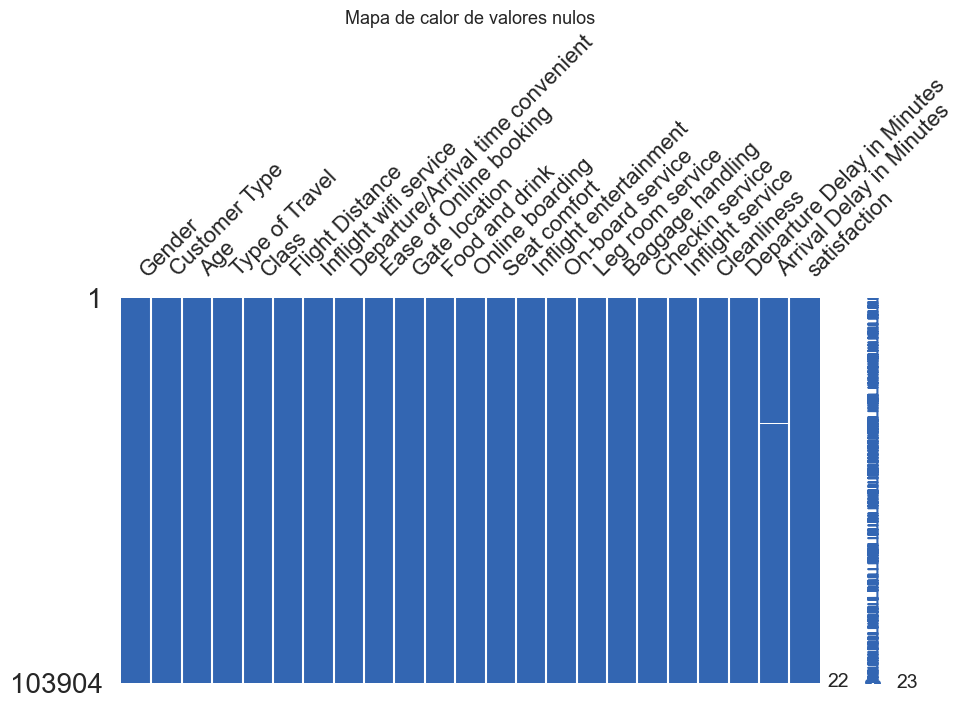


**üí¨ Interpretaci√≥n visual:**

- Cada **columna** del gr√°fico representa una variable del dataset.  
- Las **l√≠neas continuas** indican registros completos (sin nulos).  
- Las **interrupciones o franjas blancas** muestran valores faltantes.  
- En este dataset, se observa que los valores nulos son **muy pocos y concentrados**  
  en columnas espec√≠ficas (por ejemplo, *Arrival Delay in Minutes*).  
- Este an√°lisis permite decidir si los nulos deben **rellenarse (imputaci√≥n)** o **eliminarse**,  
  evitando p√©rdida de informaci√≥n relevante o sesgos en los modelos.


In [256]:
# ===================================
# 3. Valores nulos y duplicados
# Identificamos columnas con valores nulos y registros duplicados.
# ===================================


# Valores nulos
print("\nValores nulos por columna (top 10):\n")
print(df.isnull().sum().sort_values(ascending=False))



# Duplicados
dupes = df.duplicated().sum()
print(f"\nN√∫mero de filas duplicadas: {dupes}")



# Visualizaci√≥n de nulos con missingno


# Mapa de calor de nulos
msno.matrix(df, figsize=(10, 5), color=(0.2, 0.4, 0.7))
plt.title("Mapa de calor de valores nulos", fontsize=13)
plt.show()


# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- Cada **columna** del gr√°fico representa una variable del dataset.  
- Las **l√≠neas continuas** indican registros completos (sin nulos).  
- Las **interrupciones o franjas blancas** muestran valores faltantes.  
- En este dataset, se observa que los valores nulos son **muy pocos y concentrados**  
  en columnas espec√≠ficas (por ejemplo, *Arrival Delay in Minutes*).  
- Este an√°lisis permite decidir si los nulos deben **rellenarse (imputaci√≥n)** o **eliminarse**,  
  evitando p√©rdida de informaci√≥n relevante o sesgos en los modelos.
"""
))


## **Paso 4: Distribuci√≥n de la variable objetivo**

Analizamos la **variable objetivo** `satisfaction` para conocer el grado de satisfacci√≥n de los pasajeros.  
Esto permite detectar posibles **desequilibrios de clases**, algo fundamental para la elecci√≥n  
y evaluaci√≥n de los modelos de clasificaci√≥n.

El dataset clasifica a los pasajeros como:
- **Satisfied** ‚Üí Clientes satisfechos.  
- **Neutral or dissatisfied** ‚Üí Clientes neutrales o insatisfechos.

Dado que se trata de una variable **categ√≥rica binaria**, no tiene sentido aplicar una estimaci√≥n de densidad (KDE),
ya que √©sta se utiliza √∫nicamente con variables continuas.

Analizamos si las clases est√°n equilibradas o existe un desbalance en t√©rminos de satisfacci√≥n de pasajeros.


üîç **Interpretaci√≥n:**  
El conjunto de datos muestra una ligera diferencia entre pasajeros satisfechos y no satisfechos.  
El leve desbalance no es cr√≠tico, pero conviene tenerlo presente en la fase de modelado (por ejemplo, ajustando pesos de clase 
en algoritmos sensibles al desbalance).



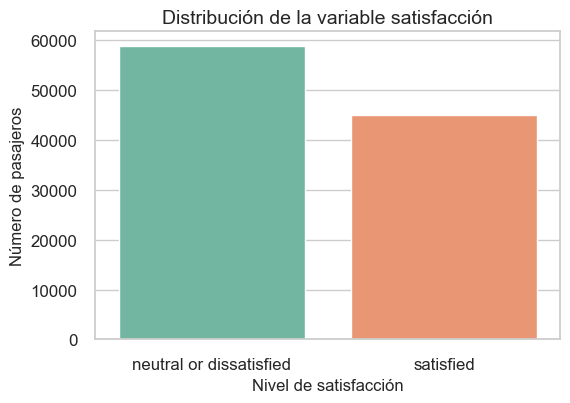

Proporci√≥n de clases (%):
 satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64



**üí¨ Interpretaci√≥n visual:**

- Se observa que la clase **‚Äúneutral or dissatisfied‚Äù** tiene una proporci√≥n ligeramente mayor  
  que la clase **‚Äúsatisfied‚Äù**, lo que indica un **desbalanceo moderado** en el dataset.  
- Este desequilibrio debe considerarse durante el entrenamiento para evitar que el modelo  
  **favorezca la clase mayoritaria**.  
- En fases posteriores, se puede mitigar este efecto mediante t√©cnicas como:
  - Ajuste de pesos (`class_weight='balanced'` en modelos lineales).  
  - Submuestreo o sobremuestreo de clases.  
  - Evaluaci√≥n con m√©tricas adecuadas (*F1-score*, *ROC-AUC*) en lugar de solo *accuracy*.


In [257]:
# ===================================
# 4. Distribuci√≥n de la variable objetivo "satisfaction"  
# ===================================

# Definir variable objetivo
target_col = "satisfaction"

# Representar la distribuci√≥n de la variable objetivo (correcto)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, hue=target_col, palette="Set2", legend=False)
plt.title("Distribuci√≥n de la variable satisfacci√≥n")
plt.xlabel("Nivel de satisfacci√≥n")
plt.ylabel("N√∫mero de pasajeros")
plt.show()

# Mostrar proporciones num√©ricas
print("Proporci√≥n de clases (%):\n", df[target_col].value_counts(normalize=True) * 100)

# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- Se observa que la clase **‚Äúneutral or dissatisfied‚Äù** tiene una proporci√≥n ligeramente mayor  
  que la clase **‚Äúsatisfied‚Äù**, lo que indica un **desbalanceo moderado** en el dataset.  
- Este desequilibrio debe considerarse durante el entrenamiento para evitar que el modelo  
  **favorezca la clase mayoritaria**.  
- En fases posteriores, se puede mitigar este efecto mediante t√©cnicas como:
  - Ajuste de pesos (`class_weight='balanced'` en modelos lineales).  
  - Submuestreo o sobremuestreo de clases.  
  - Evaluaci√≥n con m√©tricas adecuadas (*F1-score*, *ROC-AUC*) en lugar de solo *accuracy*.
"""
))

## **Paso 5: Relaci√≥n satisfacci√≥n - tipo de viaje y tipo de cliente**

En este an√°lisis comparamos la **satisfacci√≥n de los pasajeros** en funci√≥n de:
- **Tipo de viaje** (*Business vs Personal Travel*)  
- **Tipo de cliente** (*Recurrent vs First-time*)

Estos gr√°ficos ayudan a identificar patrones de comportamiento y subgrupos  
donde la satisfacci√≥n var√≠a significativamente.

Comprobamos c√≥mo var√≠a la satisfacci√≥n seg√∫n el tipo de viaje (negocios o personal)
y si el pasajero es un **Cliente fidelizado** (Loyal client o habitual) o un **Cliente no fidelizado** (Disloyal client u ocasional).

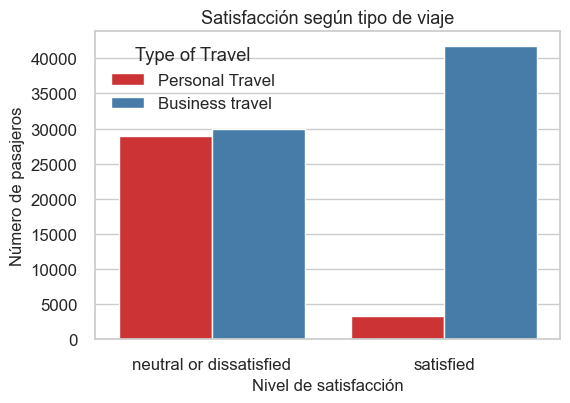

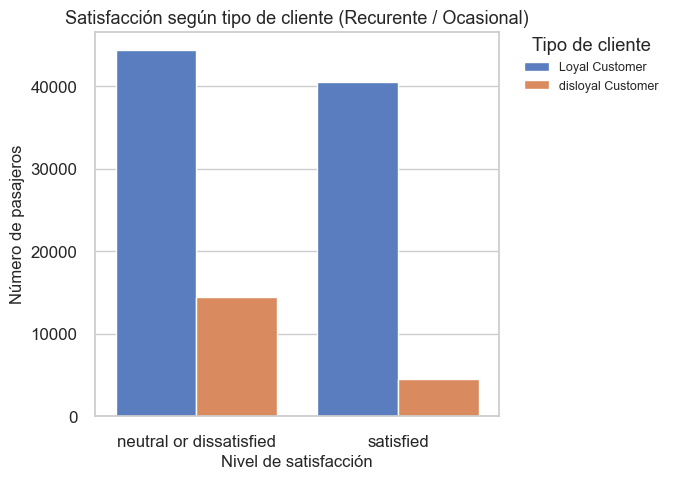


**üí¨ Interpretaci√≥n visual:**

- En el primer gr√°fico (**Tipo de viaje**), se observa que los pasajeros de **viajes de negocios (Business Travel)**  
  presentan una mayor proporci√≥n de satisfacci√≥n que los de **viajes personales (Personal Travel)**.  
  Esto podr√≠a indicar que la aerol√≠nea ofrece un mejor servicio o m√°s beneficios en viajes de negocios.  

- En el segundo gr√°fico (**Tipo de cliente**), los **clientes recurrentes (Loyal Customers)**  
  muestran una satisfacci√≥n significativamente mayor frente a los **nuevos clientes**.  
  Este patr√≥n sugiere que la fidelizaci√≥n y la experiencia previa influyen positivamente  
  en la percepci√≥n del servicio.  

- Estos hallazgos son importantes porque permiten **segmentar estrategias de mejora**  
  y entender qu√© tipo de pasajero contribuye m√°s al nivel global de satisfacci√≥n.


In [258]:
# ===================================
# 5. An√°lisis bivariado: Satisfacci√≥n vs variables categ√≥ricas (Tipo de viaje, Tipo de cliente)
# ===================================


# --- Gr√°fico 1: Satisfacci√≥n seg√∫n tipo de viaje ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="satisfaction", hue="Type of Travel", palette="Set1")
plt.title("Satisfacci√≥n seg√∫n tipo de viaje", fontsize=13)
plt.xlabel("Nivel de satisfacci√≥n")
plt.ylabel("N√∫mero de pasajeros")
plt.show()

# --- Gr√°fico 2: Satisfacci√≥n seg√∫n tipo de cliente ---
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="satisfaction", hue="Customer Type", palette="muted")
plt.title("Satisfacci√≥n seg√∫n tipo de cliente (Recurente / Ocasional)", fontsize=13)
plt.xlabel("Nivel de satisfacci√≥n")
plt.ylabel("N√∫mero de pasajeros")

# üîß Mover la leyenda fuera del gr√°fico
plt.legend(
    title="Tipo de cliente",
    bbox_to_anchor=(1.05, 1),  # posici√≥n fuera del eje derecho
    loc="upper left",
    borderaxespad=0,
    fontsize=9
)

plt.tight_layout()

plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- En el primer gr√°fico (**Tipo de viaje**), se observa que los pasajeros de **viajes de negocios (Business Travel)**  
  presentan una mayor proporci√≥n de satisfacci√≥n que los de **viajes personales (Personal Travel)**.  
  Esto podr√≠a indicar que la aerol√≠nea ofrece un mejor servicio o m√°s beneficios en viajes de negocios.  

- En el segundo gr√°fico (**Tipo de cliente**), los **clientes recurrentes (Loyal Customers)**  
  muestran una satisfacci√≥n significativamente mayor frente a los **nuevos clientes**.  
  Este patr√≥n sugiere que la fidelizaci√≥n y la experiencia previa influyen positivamente  
  en la percepci√≥n del servicio.  

- Estos hallazgos son importantes porque permiten **segmentar estrategias de mejora**  
  y entender qu√© tipo de pasajero contribuye m√°s al nivel global de satisfacci√≥n.
"""
))


## **Paso 6: An√°lisis de Outliers**

Los outliers son valores extremos que se alejan del rango central de las observaciones de los datos.
Su detecci√≥n es clave para garantizar la calidad del modelo, ya que pueden distorsionar las medias,
las varianzas y el rendimiento del aprendizaje autom√°tico.
En los boxplots se representan como puntos fuera de los ‚Äúbigotes‚Äù (whiskers),
que se extienden hasta ¬±1.5 veces el rango intercuart√≠lico (IQR).

Estos valores pueden ser errores o reflejar casos reales, como vuelos con grandes retrasos.


### Interpretaci√≥n de los boxplots

- Los puntos fuera de los bigotes son valores extremos.
- En las variables de retrasos, estos valores son esperables y reales.
- No se eliminan directamente, pero pueden tratarse mediante:
  - **Winsorizaci√≥n**: limitar valores al percentil 1% y 99%.
  - **Transformaci√≥n logar√≠tmica**: comprimir la escala de variables con colas largas.


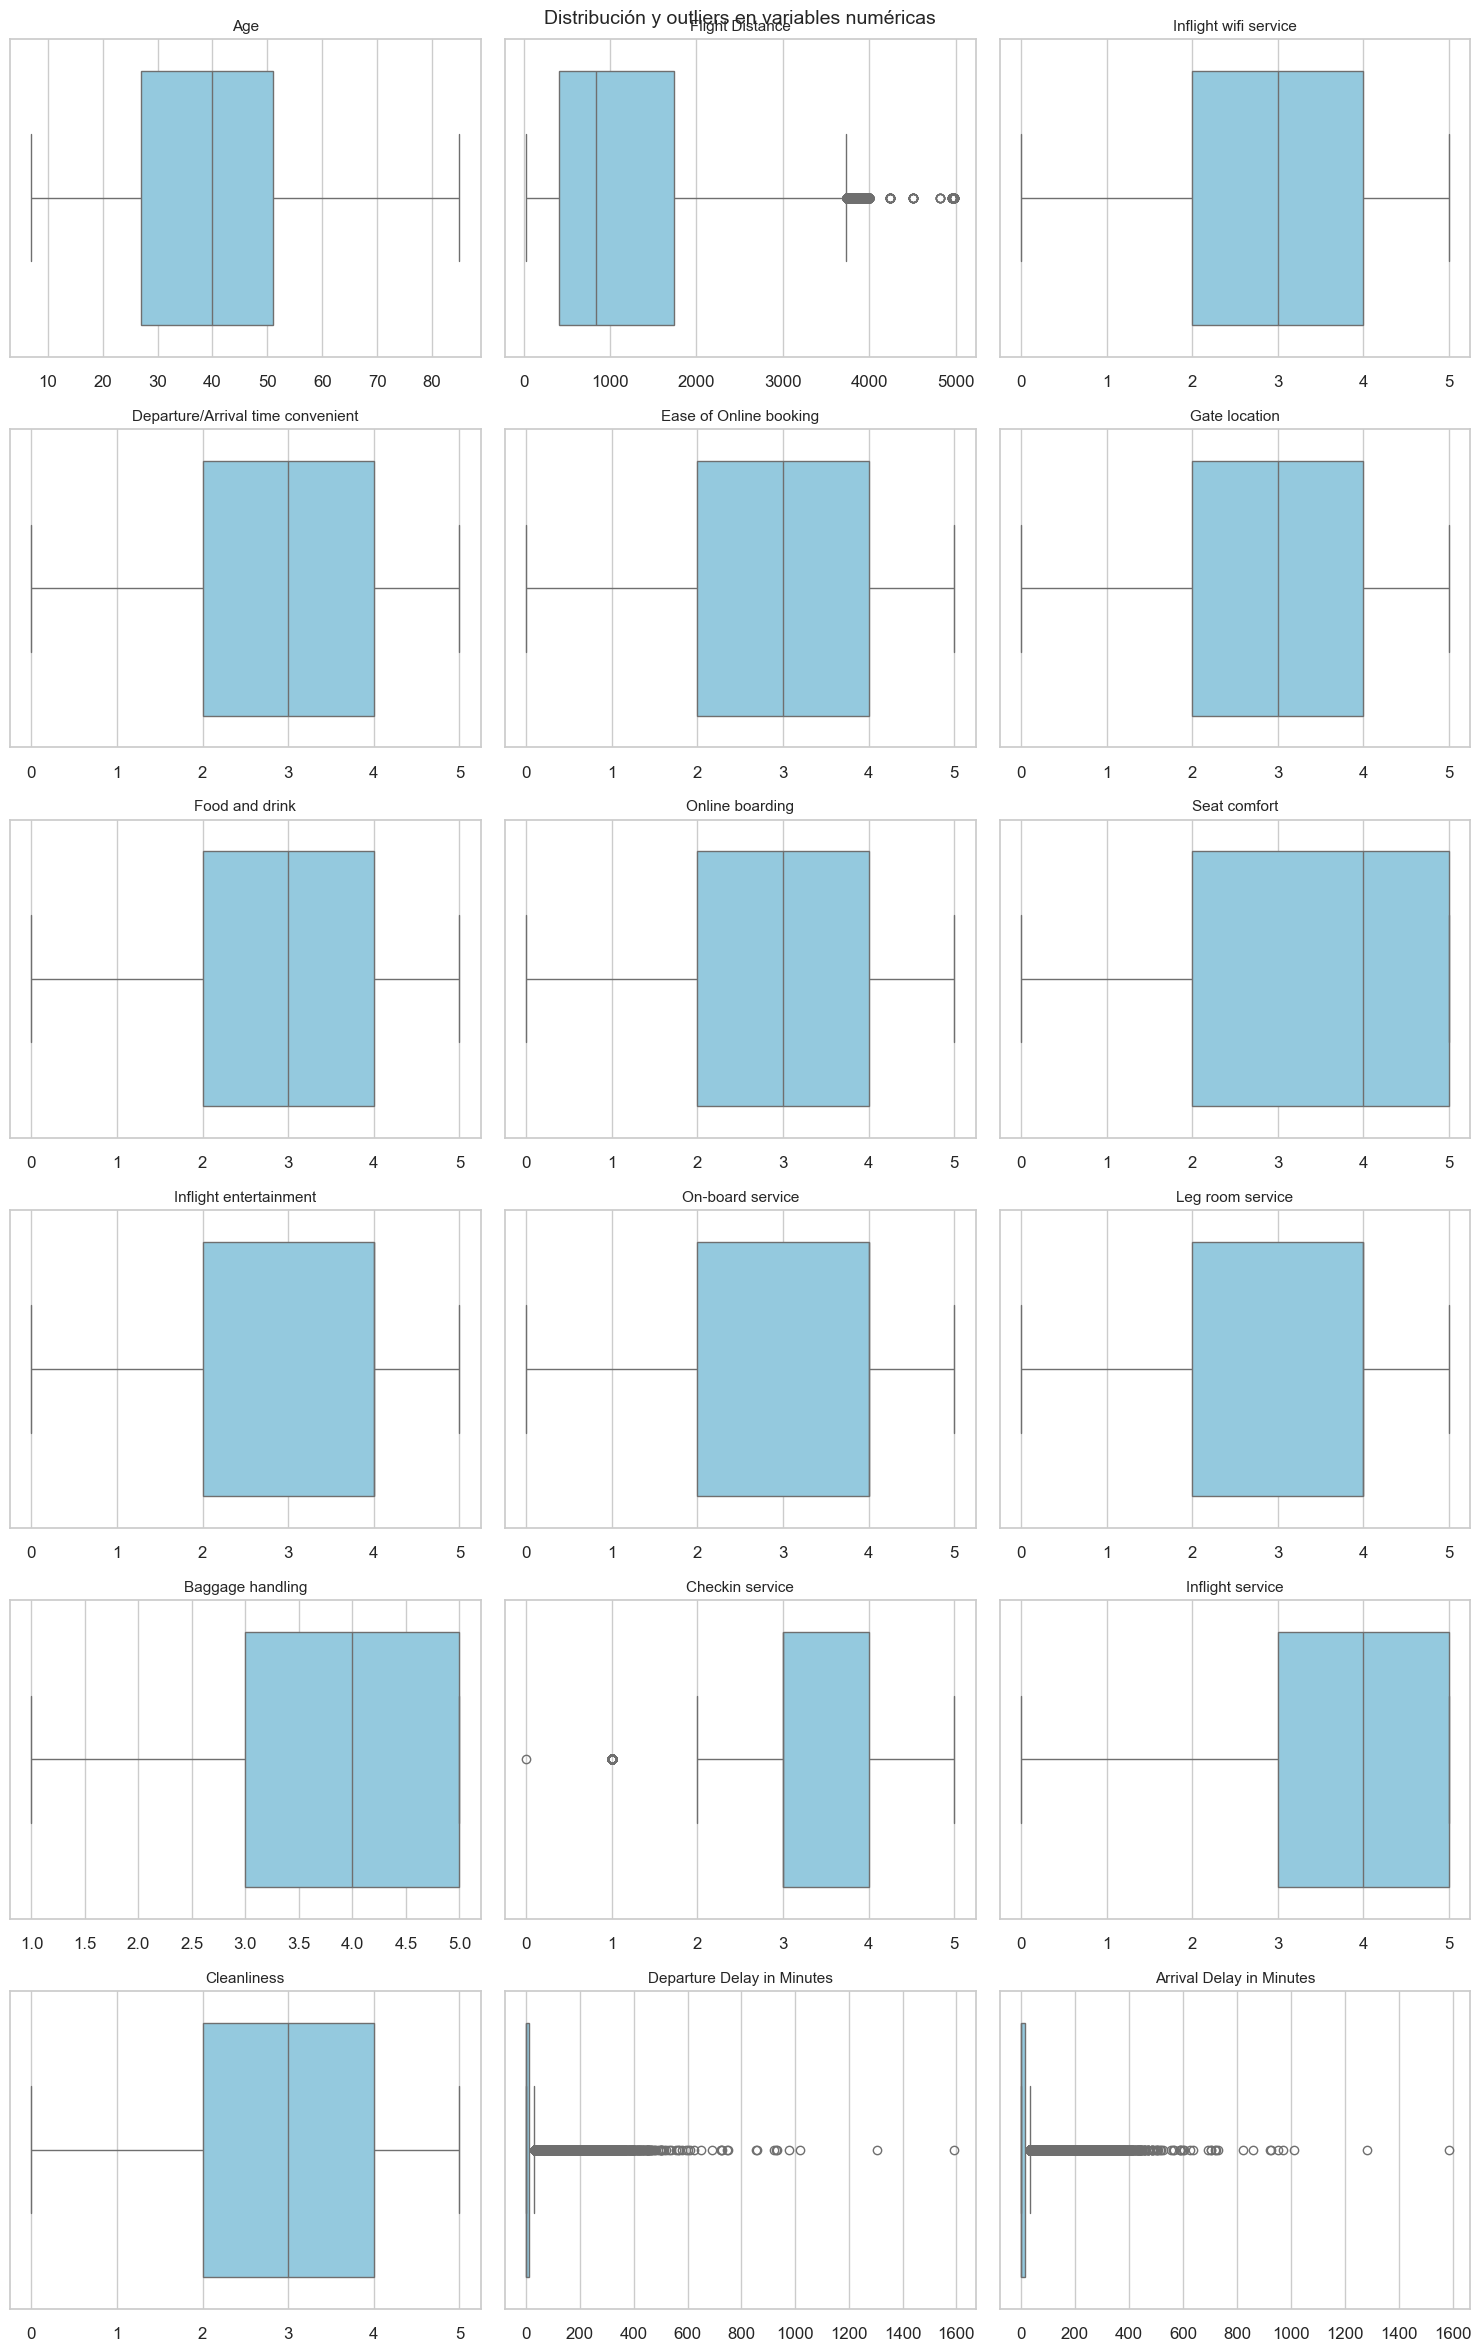


**üí¨ Interpretaci√≥n visual:**

- Se observan **valores extremos** especialmente en variables como  
  `Departure Delay in Minutes`, `Arrival Delay in Minutes` y `Flight Distance`.  
- Estos outliers reflejan **situaciones reales de operaci√≥n a√©rea**,  
  como vuelos con grandes retrasos o distancias muy largas.  
- En lugar de eliminarse directamente, se tratar√°n con t√©cnicas como:
  - **Winsorizaci√≥n** ‚Üí limitar los valores a percentiles (por ejemplo, 1%‚Äì99%).  
  - **Transformaci√≥n logar√≠tmica** ‚Üí comprimir la escala de las distribuciones sesgadas.  
- Esto preserva la informaci√≥n y evita sesgos en las m√©tricas de los modelos.


In [259]:
# ===================================
# 6. Outliers 
# An√°lisis univariado: Variables num√©ricas
# ===================================

# Visualizaci√≥n de outlier

'''
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
    plt.xlabel(col)
    plt.ylabel("Valor")
    plt.show()
    '''

# --- Seleccionar solo variables num√©ricas ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# --- Visualizaci√≥n en cuadr√≠cula para mejor legibilidad ---
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminar ejes vac√≠os si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribuci√≥n y outliers en variables num√©ricas", fontsize=14)
plt.tight_layout()
plt.show()


# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- Se observan **valores extremos** especialmente en variables como  
  `Departure Delay in Minutes`, `Arrival Delay in Minutes` y `Flight Distance`.  
- Estos outliers reflejan **situaciones reales de operaci√≥n a√©rea**,  
  como vuelos con grandes retrasos o distancias muy largas.  
- En lugar de eliminarse directamente, se tratar√°n con t√©cnicas como:
  - **Winsorizaci√≥n** ‚Üí limitar los valores a percentiles (por ejemplo, 1%‚Äì99%).  
  - **Transformaci√≥n logar√≠tmica** ‚Üí comprimir la escala de las distribuciones sesgadas.  
- Esto preserva la informaci√≥n y evita sesgos en las m√©tricas de los modelos.
"""
))
    


## **Paso 7: Winsorizaci√≥n - Tramiento de outliers**

En el an√°lisis anterior de los valores at√≠picos del dataset observamos en la siguientes variables:

- **Departure Delay in Minutes** ‚Üí Retrasos en la salida.  
- **Arrival Delay in Minutes** ‚Üí Retrasos en la llegada.  
- **Flight Distance** ‚Üí Distancia total del vuelo.

### üîç Interpretaci√≥n de los outliers

- En las variables de retraso, los outliers representan **vuelos con demoras extremas**, 
  que pueden deberse a causas operativas (clima, mantenimiento, congesti√≥n a√©rea).  
  Estos casos son poco frecuentes pero **reales**, no errores, por lo que no deben eliminarse.
  
- En la variable **Flight Distance**, los outliers reflejan **vuelos muy largos**, 
  que igualmente son leg√≠timos, ya que la aerol√≠nea puede operar rutas de distinta duraci√≥n.

Por tanto, **no eliminamos los valores at√≠picos**, sino que aplicamos una **winsorizaci√≥n**:
recortamos los valores extremos al percentil 1 % y 99 % de cada distribuci√≥n.  
Esto reduce su influencia estad√≠stica sin perder informaci√≥n representativa.



### üí¨ Nota t√©cnica: Por qu√© aplicamos Winsorizaci√≥n en lugar del m√©todo IQR

Tras la detecci√≥n de valores at√≠picos en las variables **Departure Delay in Minutes**,  
**Arrival Delay in Minutes** y **Flight Distance**, se decidi√≥ aplicar **winsorizaci√≥n**  
en lugar de eliminar los valores extremos mediante el m√©todo del rango intercuart√≠lico (IQR).

#### üîπ Winsorizaci√≥n
- Sustituye los valores extremos por los l√≠mites de percentiles definidos (en este caso, 1% y 99%).
- Mantiene **todas las filas del dataset**, preservando la informaci√≥n de cada vuelo.
- Es ideal cuando los valores at√≠picos **representan casos reales**, no errores de registro.

#### üîπ M√©todo IQR
- Considera *outliers* los valores fuera del rango `[Q1 - 1.5√óIQR, Q3 + 1.5√óIQR]`.
- Elimina las filas que contienen dichos valores.
- Es √∫til cuando los outliers son **errores evidentes o inconsistencias** en los datos.

#### ‚öñÔ∏è Comparaci√≥n aplicada a este dataset
En este caso, los valores at√≠picos no corresponden a errores, sino a **situaciones reales**:
- Vuelos con retrasos muy largos (debido a condiciones operativas o meteorol√≥gicas).  
- Rutas intercontinentales con mayor distancia de vuelo.  

Eliminar estas observaciones con el m√©todo IQR habr√≠a reducido significativamente el tama√±o del dataset  
y eliminado informaci√≥n relevante sobre **la relaci√≥n entre los retrasos extremos y la insatisfacci√≥n del cliente**.

Por tanto, la **winsorizaci√≥n** es el m√©todo m√°s adecuado porque:
- Conserva la integridad del dataset.  
- Reduce la influencia de valores extremos en las medias y correlaciones.  
- Mantiene la representatividad de los casos reales en el modelado posterior.



In [260]:
# ===================================
# 7. Winsorizaci√≥n - Tratamiento de outliers
# ===================================

# Winsorizaci√≥n de variables con outliers
cols_winsor = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance"]

for col in cols_winsor:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)

print("‚úÖ Winsorizaci√≥n aplicada en columnas:", cols_winsor)

# Verificar rango tras winsorizaci√≥n
df[cols_winsor].describe(percentiles=[0.01, 0.5, 0.99])


‚úÖ Winsorizaci√≥n aplicada en columnas: ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']


Departure Delay in Minutes  Arrival Delay in Minutes  Flight Distance
count               103904.000000             103594.000000    103904.000000
mean                    13.965996                 14.309719      1188.623143
std                     31.215555                 31.620373       994.112961
min                      0.000000                  0.000000       101.000000
1%                       0.000000                  0.000000       101.000000
50%                      0.000000                  0.000000       843.000000
99%                    181.940900                184.000000      3882.000000
max                    181.970000                184.000000      3882.000000

## **Paso 8: Limpieza final (Revisi√≥n nulos y duplicados tras tratamiento valores at√≠picos)**

- **Eliminaci√≥n (`dropna`)** ‚Üí adecuada si los valores nulos son escasos (por ejemplo, < 1 % del total).  
- **Imputaci√≥n (`fillna`)** ‚Üí recomendable si los nulos afectan a variables importantes.  
  Se pueden reemplazar por la **media** o la **mediana** seg√∫n la distribuci√≥n:
  - *Media:* √∫til para distribuciones normales.
  - *Mediana:* preferible cuando hay asimetr√≠a o valores extremos.

En este caso, los nulos se imputan con la **mediana**, ya que algunas variables, como los retrasos, 
no siguen una distribuci√≥n sim√©trica.

### üîç Interpretaci√≥n final del tratamiento

Despu√©s del tratamiento:

- Las variables de retraso y distancia ya no tienen valores extremos que distorsionen los an√°lisis estad√≠sticos.
- Los valores nulos se han imputado con la mediana para mantener la consistencia.
- Se eliminaron los duplicados, garantizando un dataset √∫nico y coherente.

A partir de este punto, el dataset queda **listo para la fase de an√°lisis exploratorio profundo**, 
donde realizaremos:
- Los **KDE plots** por clases de satisfacci√≥n (para estudiar la distribuci√≥n de variables num√©ricas).  
- La **matriz de correlaci√≥n**, para evaluar la relaci√≥n entre caracter√≠sticas y evitar multicolinealidad.





In [261]:
# ===================================
# 8. Limpieza final (Revisi√≥n nulos y duplicados tras tratamiento valores at√≠picos)
# ===================================

# Revisi√≥n y tratamiento de valores nulos tras winsorizaci√≥n
nulos = df.isna().sum()
print("Valores nulos detectados:\n", nulos[nulos > 0] if nulos.sum() > 0 else "No hay valores nulos.")

# Imputar nulos con la mediana
for col in df.columns:
    if df[col].isna().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Nulos imputados en {col} con mediana ({median_value:.2f}).")

# Ver total de valores faltantes por columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# No tenemos valores nulos

# Revisi√≥n y eliminaci√≥n de duplicados
dupes = df.duplicated().sum()
print(f"\nFilas duplicadas detectadas: {dupes}")

if dupes > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados correctamente.")

# Verificaci√≥n de coherencia final
print("\n‚úÖ Verificaci√≥n del dataset:")
print(f"Tama√±o final: {df.shape}")
print(f"Valores nulos restantes: {df.isna().sum().sum()}")
print(f"Duplicados restantes: {df.duplicated().sum()}")


Valores nulos detectados:
 Arrival Delay in Minutes    310
dtype: int64
Nulos imputados en Arrival Delay in Minutes con mediana (0.00).
Series([], dtype: int64)

Filas duplicadas detectadas: 0

‚úÖ Verificaci√≥n del dataset:
Tama√±o final: (103904, 23)
Valores nulos restantes: 0
Duplicados restantes: 0


## **Paso 9:  An√°lisis de densidad de variables num√©ricas (KDE plots por clase de satisfacci√≥n)**

Los **KDE plots** (*Kernel Density Estimation*) muestran la distribuci√≥n de probabilidad de una variable num√©rica.  
A diferencia de los histogramas, generan una curva suavizada que permite comparar la forma de las distribuciones entre categor√≠as o las principales variables num√©ricas, divididas por la variable objetivo `satisfaction` (*Satisfied* vs *Neutral or Dissatisfied*).

Esto nos permite observar si las caracter√≠sticas num√©ricas tienden a comportarse de manera distinta seg√∫n el nivel de satisfacci√≥n del pasajero. Al representarlos por clases de la variable objetivo, observamos si las distribuciones difieren entre pasajeros satisfechos e insatisfechos.

Si las curvas est√°n separadas ‚Üí variable con capacidad discriminante.  
Si se solapan ‚Üí variable menos √∫til para el modelo.


### üîç Interpretaci√≥n

Podemos observar:
- Variables como **Online boarding**, **Seat comfort** y **Inflight wifi service** presentan curvas muy diferenciadas seg√∫n la satisfacci√≥n del pasajero, lo que sugiere que son **variables predictoras relevantes**.
- En cambio, **Age** o **Flight Distance** muestran distribuciones similares en ambas clases, por lo que su influencia podr√≠a ser menor.



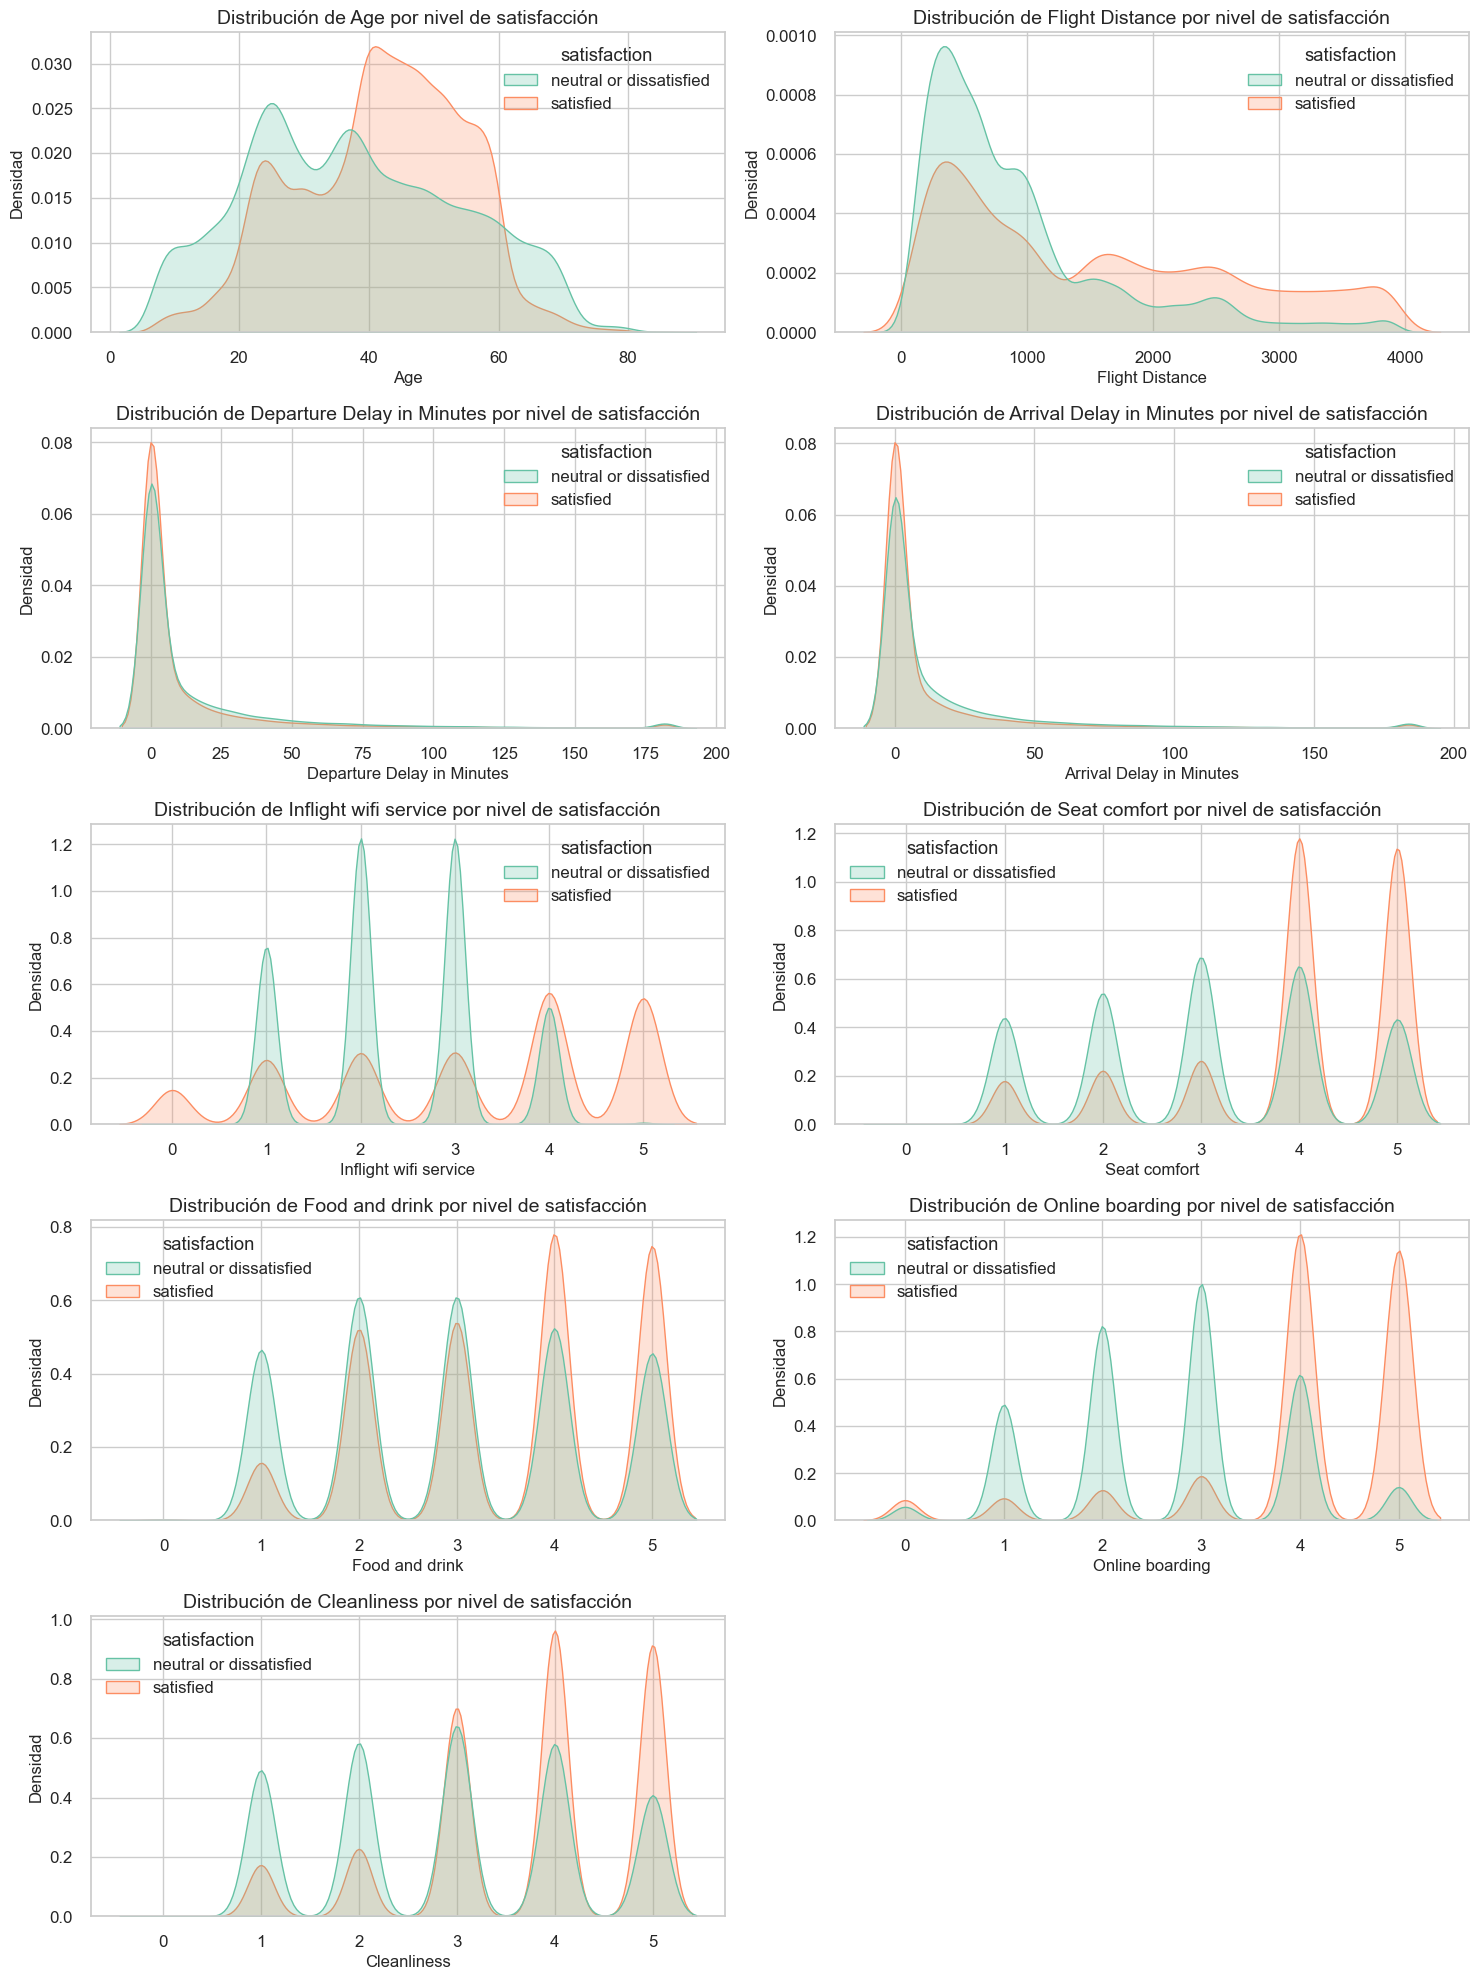


**üí¨ Interpretaci√≥n visual:**

- Las curvas muestran **diferencias notables entre las clases** en varias variables.  
  Por ejemplo:
  - En *Online boarding*, los pasajeros **satisfechos** tienden a concentrarse en valores altos,  
    lo que sugiere que la eficiencia en el embarque influye positivamente en la satisfacci√≥n.  
  - En *Flight Distance*, ambas clases presentan distribuciones similares,  
    por lo que esta variable probablemente **no sea muy discriminante**.  
  - En *Departure* y *Arrival Delay*, los pasajeros **insatisfechos** se concentran m√°s en retrasos altos.  

- En general, estas observaciones permiten **identificar las variables m√°s relevantes**
  que podr√≠an tener un mayor impacto en los modelos de clasificaci√≥n.


In [262]:
# ===================================
# 9. An√°lisis de densidad de variables num√©ricas (KDE plots por clase de satisfacci√≥n)
# ===================================


# Variables num√©ricas principales a analizar
num_cols = [
    "Age", "Flight Distance", 
    "Departure Delay in Minutes", "Arrival Delay in Minutes",
    "Inflight wifi service", "Seat comfort", 
    "Food and drink", "Online boarding", "Cleanliness"
]

# Crear los KDE plots por clase de satisfacci√≥n
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df, x=col, hue="satisfaction", fill=True, common_norm=False, palette="Set2")
    plt.title(f"Distribuci√≥n de {col} por nivel de satisfacci√≥n")
    plt.xlabel(col)
    plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- Las curvas muestran **diferencias notables entre las clases** en varias variables.  
  Por ejemplo:
  - En *Online boarding*, los pasajeros **satisfechos** tienden a concentrarse en valores altos,  
    lo que sugiere que la eficiencia en el embarque influye positivamente en la satisfacci√≥n.  
  - En *Flight Distance*, ambas clases presentan distribuciones similares,  
    por lo que esta variable probablemente **no sea muy discriminante**.  
  - En *Departure* y *Arrival Delay*, los pasajeros **insatisfechos** se concentran m√°s en retrasos altos.  

- En general, estas observaciones permiten **identificar las variables m√°s relevantes**
  que podr√≠an tener un mayor impacto en los modelos de clasificaci√≥n.
"""
))


## **Paso 10: Matriz de correlaci√≥n**

La matriz de correlaci√≥n nos permite identificar relaciones lineales entre variables num√©ricas.  
Correlaciones muy altas (|r| > 0.8) pueden generar multicolinealidad, afectando a modelos lineales.

Esto ayuda a:
- Detectar variables redundantes (altamente correlacionadas entre s√≠) o poco informativas**.  
- Comprender cu√°les est√°n m√°s relacionadas con la variable objetivo (si la convertimos a num√©rica).  
- Reducir el riesgo de **multicolinealidad**, que puede afectar el rendimiento de algunos modelos.

Aqu√≠ representamos la correlaci√≥n de Pearson entre las variables num√©ricas del dataset.

Convertimos la variable `satisfaction` a valores num√©ricos:
- *Satisfied ‚Üí 1*  
- *Neutral or Dissatisfied ‚Üí 0*


### üîç Interpretaci√≥n

- Las variables fuertemente correlacionadas aportan informaci√≥n redundante. 
- En modelos basados en √°rboles (RandomForest, XGBoost, etc.), esto no suele afectar.  
- En modelos lineales (SVM, Logistic Regression), puede perjudicar el rendimiento, 
por lo que conviene eliminar o combinar las variables correlacionadas.

- Las variables con **mayor correlaci√≥n positiva** con la satisfacci√≥n son:  
  **Online boarding**, **Seat comfort**, **Inflight entertainment**, y **Cleanliness**.  
  Esto indica que una mejor experiencia en estos aspectos se asocia con pasajeros m√°s satisfechos.

- Variables con **correlaci√≥n negativa** (aunque baja) reflejan condiciones que tienden a generar insatisfacci√≥n,  
  como mayores **retrasos de llegada o salida**.

- No se observan correlaciones extremadamente altas entre variables independientes,  
  lo que indica que el riesgo de multicolinealidad es bajo.



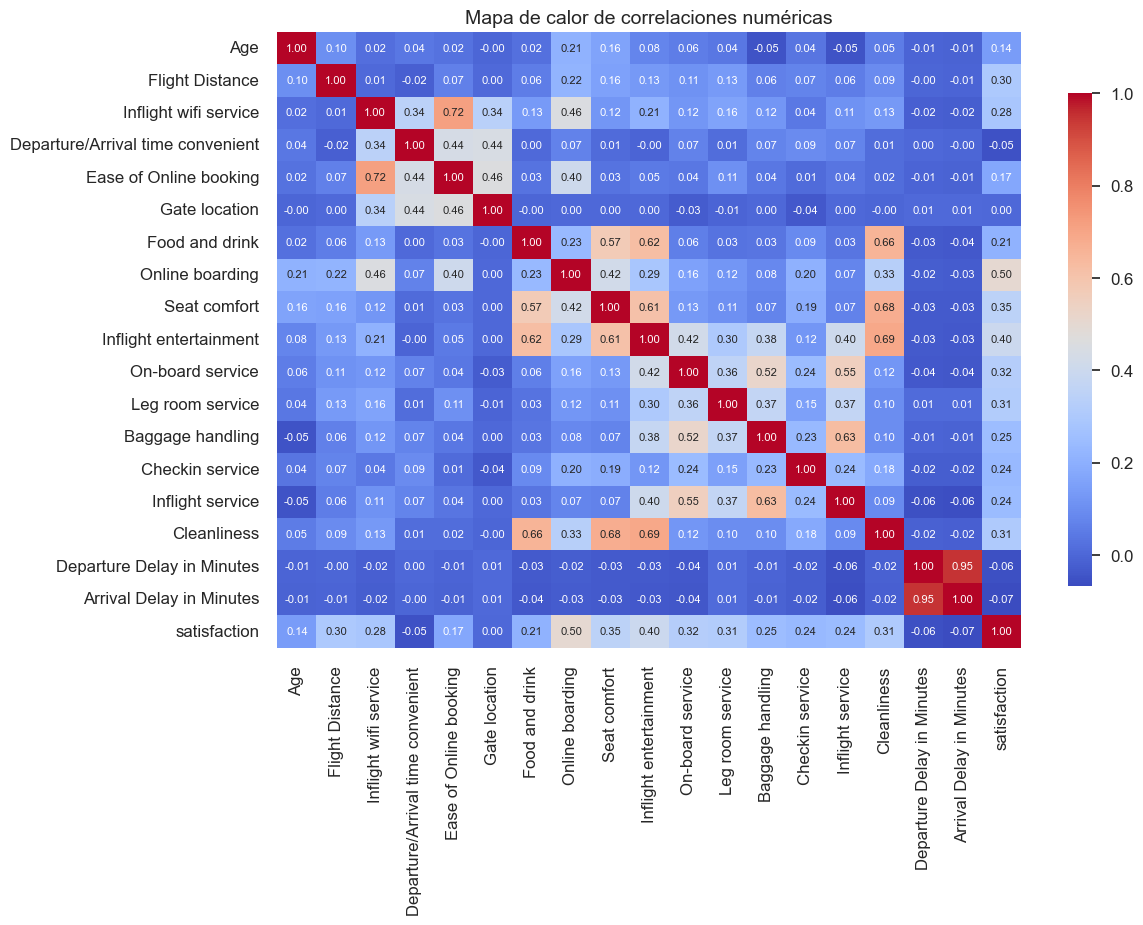

üìä Correlaciones con la variable objetivo:
satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.299167
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.058261
Arrival Delay in Minutes            -0.067163
Name: satisfaction, dtype: float64


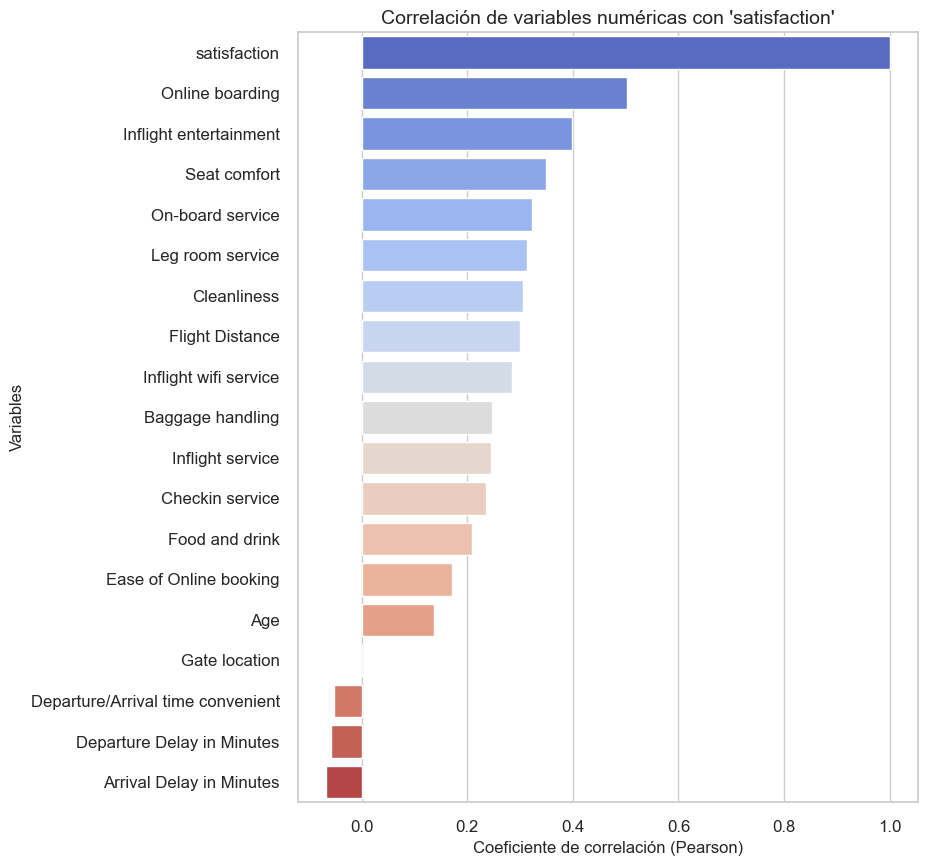


**üí¨ Interpretaci√≥n visual:**

- Variables como **Online boarding**, **Inflight entertainment**, **Seat comfort** y  
  **Cleanliness** muestran correlaciones positivas altas con `satisfaction`,  
  lo que indica que influyen fuertemente en la percepci√≥n del pasajero.  
- Por el contrario, **Departure Delay** y **Arrival Delay** presentan correlaciones negativas,  
  sugiriendo que los retrasos reducen significativamente la satisfacci√≥n.  
- Este patr√≥n es coherente con la l√≥gica de negocio:  
  una mejor experiencia en vuelo y puntualidad se traducen en clientes m√°s satisfechos.  

Estas correlaciones guiar√°n la **selecci√≥n de caracter√≠sticas** para los modelos predictivos,
permitiendo centrarse en las variables m√°s relevantes y evitar redundancias.


In [263]:
# ===================================
# 10. An√°lisis de correlaciones
# ===================================

# Creamos una copia del DataFrame original para no modificar 'df'
# (Esto nos permite convertir la variable 'satisfaction' a num√©rica solo para el an√°lisis de correlaci√≥n,
#  manteniendo el dataset original intacto para los pasos posteriores del EDA y la exportaci√≥n.)
df_corr = df.copy()
df_corr["satisfaction"] = df_corr["satisfaction"].map({
    "satisfied": 1, 
    "neutral or dissatisfied": 0
})

# Seleccionar solo las columnas num√©ricas
df_num = df_corr.select_dtypes(include=["int64", "float64"])

# --- Heatmap de correlaciones num√©ricas ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_num.corr(),
    cmap="coolwarm",
    annot=True,            # muestra los valores dentro de cada celda
    fmt=".2f",             # formato con 2 decimales
    annot_kws={"size": 8}, # tama√±o del texto
    cbar_kws={'shrink': 0.8}
)
plt.title("Mapa de calor de correlaciones num√©ricas", fontsize=14)
plt.show()

# --- Correlaciones con la variable objetivo ---
target_col = "satisfaction"
correlations = df_num.corr()[target_col].sort_values(ascending=False)

print("üìä Correlaciones con la variable objetivo:")
print(correlations)

# --- Visualizaci√≥n en gr√°fico de barras ---
plt.figure(figsize=(8, 10))
sns.barplot(
    x=correlations.values,
    y=correlations.index,
    hue=correlations.index,   # usar cada variable como hue
    palette="coolwarm",
    dodge=False,
    legend=False
)

plt.title(f"Correlaci√≥n de variables num√©ricas con '{target_col}'", fontsize=14)
plt.xlabel("Coeficiente de correlaci√≥n (Pearson)")
plt.ylabel("Variables")
plt.show()

# --- Comentario interpretativo ---
display(Markdown(
"""
**üí¨ Interpretaci√≥n visual:**

- Variables como **Online boarding**, **Inflight entertainment**, **Seat comfort** y  
  **Cleanliness** muestran correlaciones positivas altas con `satisfaction`,  
  lo que indica que influyen fuertemente en la percepci√≥n del pasajero.  
- Por el contrario, **Departure Delay** y **Arrival Delay** presentan correlaciones negativas,  
  sugiriendo que los retrasos reducen significativamente la satisfacci√≥n.  
- Este patr√≥n es coherente con la l√≥gica de negocio:  
  una mejor experiencia en vuelo y puntualidad se traducen en clientes m√°s satisfechos.  

Estas correlaciones guiar√°n la **selecci√≥n de caracter√≠sticas** para los modelos predictivos,
permitiendo centrarse en las variables m√°s relevantes y evitar redundancias.
"""
))


## **Paso 11: Exportaci√≥n del dataset limpio para modelado**

Tras completar el an√°lisis exploratorio y el tratamiento de valores at√≠picos, nulos y duplicados,  
exportamos el dataset procesado para utilizarlo en las siguientes fases del proyecto de clasificaci√≥n.

El dataset limpio incluir√° √∫nicamente las columnas relevantes, sin valores faltantes ni duplicados,  
y con las variables num√©ricas tratadas (outliers corregidos mediante winsorizaci√≥n).

In [264]:
# Exportaci√≥n del dataset limpio

# Creamos el directorio de salida si no existe
import os
os.makedirs("../data/processed", exist_ok=True)

# Guardamos el dataset limpio
output_path = "../data/processed/cleaned_airline_satisfaction.csv"
df.to_csv(output_path, index=False)

# Confirmaci√≥n
print(f"‚úÖ Dataset limpio exportado correctamente: {output_path}")
print(f"Tama√±o final: {df.shape}")
print(f"Columnas exportadas: {df.columns.tolist()}")


‚úÖ Dataset limpio exportado correctamente: ../data/processed/cleaned_airline_satisfaction.csv
Tama√±o final: (103904, 23)
Columnas exportadas: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


# üèÅ **Conclusiones del An√°lisis Exploratorio (EDA)**

Durante este an√°lisis se han realizado los siguientes pasos:

1. **Limpieza estructural inicial**: eliminaci√≥n de columnas irrelevantes (`Unnamed: 0`, `id`), detecci√≥n de nulos y duplicados.  
2. **An√°lisis descriptivo**: distribuci√≥n de la variable objetivo `satisfaction` y su relaci√≥n con las variables categ√≥ricas.  
3. **Detecci√≥n y tratamiento de outliers** mediante winsorizaci√≥n en las variables de retraso y distancia.  
4. **Limpieza final**: imputaci√≥n de nulos con la mediana y eliminaci√≥n de duplicados.  
5. **Exploraci√≥n visual** con **KDE plots** por clase y **mapa de correlaci√≥n** para identificar las variables m√°s influyentes.  

### üîç Hallazgos clave

- Las variables **Online boarding**, **Seat comfort**, **Inflight entertainment** y **Cleanliness** presentan las correlaciones m√°s altas con la satisfacci√≥n.  
- Los **retrasos de salida y llegada** tienen correlaci√≥n negativa con la satisfacci√≥n.  
- No se detecta multicolinealidad fuerte entre las variables num√©ricas.  
- El dataset final queda **consistente y equilibrado**, listo para su uso en modelado supervisado.

---

## üöÄ Pr√≥ximos pasos

En el siguiente notebook:

üìÑ **`02_dataset-split.ipynb`**

- Dividiremos el dataset en subconjuntos de **entrenamiento (80%)** y **validaci√≥n (20%)**.  
- Prepararemos las versiones **escaladas y no escaladas** seg√∫n los algoritmos a aplicar.  
- Estableceremos la base para el entrenamiento, validaci√≥n cruzada y tuning de hiperpar√°metros en los siguientes notebooks.

---

> üíæ *El archivo exportado se encuentra en la carpeta `../data/processed` con el nombre*  
> **`cleaned_airline_satisfaction.csv`**
